In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# global parameters

L = 10      # side length
N = L ** 2  # number of sites
q = 5       # number of states per site
J = 1       # ferromagnetic interaction strength

In [102]:
def energy_nn(sigma, J):
    en = 0
    for i in range(L):
        for j in range(L):
            if sigma[i, j] == sigma[i, (j + 1) % L]: en -= J
            if sigma[i, j] == sigma[(i + 1) % L, j]: en -= J
    return en

def delta_energy_nn(sigma, J, ind, new_q):
    i, j = ind
    neighs = [(i, (j+1)%L), (i, (j-1)%L), ((i+1)%L, j), ((i-1)%L, j)]
    delta_en = 0
    for x, y in neighs:
        if sigma[i, j] == sigma[x, y]:
            delta_en += J
        if new_q == sigma[x, y]:
            delta_en -= J
    return delta_en

def propose_flip(sigma, J):
    index = np.random.randint(0, N)
    index = index // L, index % L
    x = np.random.randint(0, q)
    while x == sigma[index]:
        x = np.random.randint(0, q)
    return index, x

# metropolis acceptance with symmetric proposal. returns a Boolean
def metropolis(delta_en, t):
    if delta_en < 0:
        return True
    if np.random.uniform(0, 1) < np.exp( - delta_en / t ):
        return True
    return False

In [126]:
%%timeit
# Monte Carlo simulation

np.random.seed(1)

# random initial configuration
sigma = np.random.randint(0, q, (L, L))   # change

t = 0.0001
nstep = 300000
stride = 1000

en = energy_nn(sigma, J)

en_history = []
mag_history = np.zeros((q, nstep+1))
prob_history = []
n_accepted = 0
mag_history[:, 0] = np.bincount(sigma.reshape(-1), minlength=q)   # change

for istep in range(nstep):

    # propose random flip
    ind, q_new = propose_flip(sigma, J)
    # compute energy difference
    delta_en = delta_energy_nn(sigma, J, ind, q_new)

    # update probability history
    if delta_en > 0:
        prob_history.append(np.exp(- delta_en / t))
    else:
        prob_history.append(1)

    # prepare magnetization update
    mag_history[:, istep+1] = mag_history[:, istep]

    # metropolis update rule
    if metropolis(delta_en, t):
        # update state
        q_old = sigma[ind]
        sigma[ind] = q_new
        n_accepted += 1

        # update energy
        en += delta_en
        # update magnetization history
        mag_history[q_old, istep+1] -= 1
        mag_history[q_new, istep+1] += 1

    # update energy history
    en_history.append(en)

    if istep % stride == 0:
        print(istep, en)

en_history = np.array(en_history)
prob_history = np.array(prob_history)

0 -35
1000 -139
2000 -160
3000 -165
4000 -170
5000 -170
6000 -170
7000 -170
8000 -170
9000 -170
10000 -170
11000 -170
12000 -170
13000 -170
14000 -170
15000 -170
16000 -170
17000 -170
18000 -170
19000 -170
20000 -170
21000 -170
22000 -170
23000 -170
24000 -170
25000 -170
26000 -170
27000 -170
28000 -170
29000 -170
30000 -170
31000 -170
32000 -170
33000 -170
34000 -170
35000 -170
36000 -170
37000 -170
38000 -170
39000 -170
40000 -170
41000 -170
42000 -170
43000 -170
44000 -170
45000 -170
46000 -170
47000 -170
48000 -170
49000 -170
50000 -170
51000 -170
52000 -170
53000 -170
54000 -170
55000 -170
56000 -170
57000 -170
58000 -170
59000 -170
60000 -170
61000 -170
62000 -170
63000 -170
64000 -170
65000 -170
66000 -170
67000 -170
68000 -170
69000 -170
70000 -170
71000 -170
72000 -170
73000 -170
74000 -170
75000 -170
76000 -170
77000 -170
78000 -170
79000 -170
80000 -170
81000 -170
82000 -170
83000 -170
84000 -170
85000 -170
86000 -170
87000 -170
88000 -170
89000 -170
90000 -170
91000 -170
92

In [120]:
burnin = 0
en_history_full = en_history
mag_history_full = mag_history
en_history = en_history[burnin:]
mag_history = mag_history[:, burnin:]

Average energy: -169.70140333333333


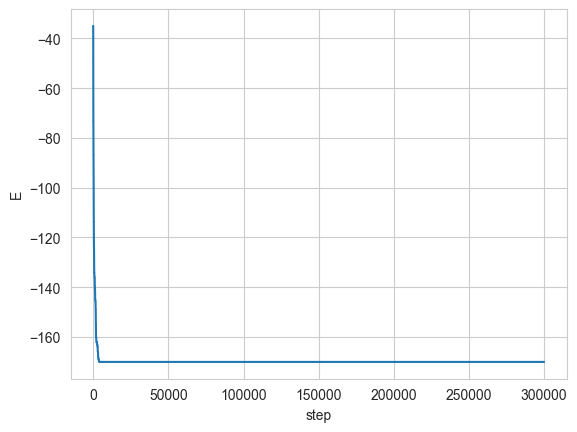

In [121]:
plt.plot(en_history)
plt.xlabel("step")
plt.ylabel("E")
print(f'Average energy: {en_history.mean()}')
plt.show()

Fraction of accepted proposals: 0.0009933333333333333


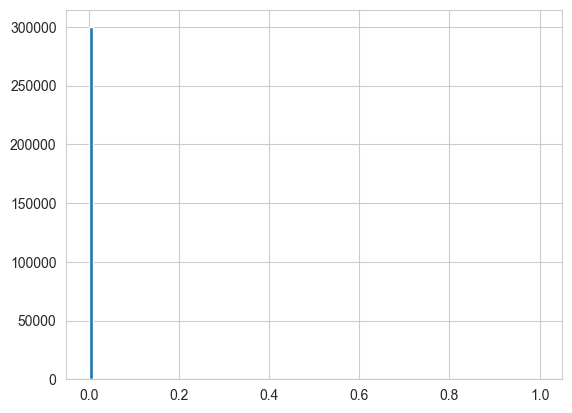

In [122]:
print(f"Fraction of accepted proposals: {n_accepted / nstep}")
plt.hist(prob_history, bins=100)
plt.show()

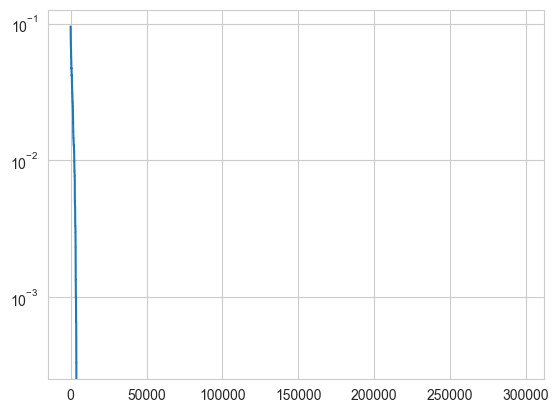

In [123]:
# convolve acceptance probabilities with a kernel to improve visualization
window_size = 3000
kernel = np.ones(window_size) / window_size
smoothed_probs = np.convolve(prob_history, kernel, mode='valid')

# plot
plt.plot(smoothed_probs)
plt.yscale('log')
plt.show()

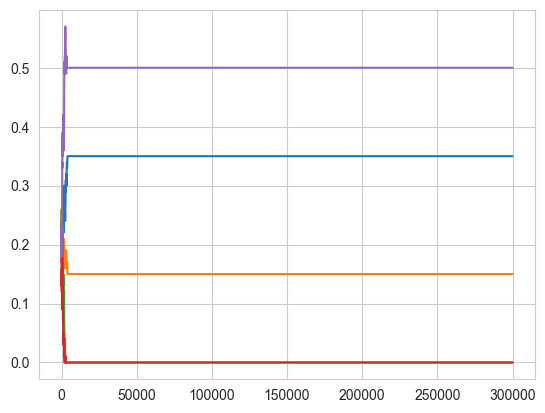

In [124]:
# print magnetization evolution in time#
for i in range(q):
    plt.plot(mag_history[i] / N, label=i)
plt.show()

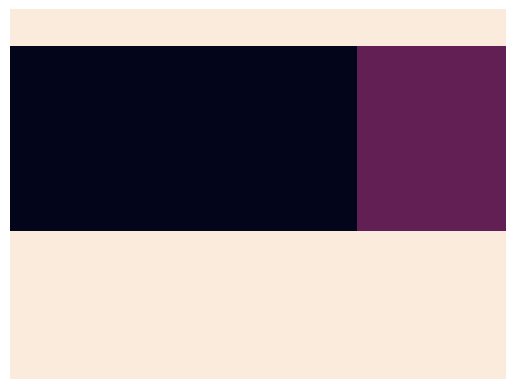

In [125]:
sns.heatmap(sigma.reshape(L, L), cbar=False, xticklabels=False, yticklabels=False)
plt.show()